# Introduction

This notebook is an implementation of Dr. Jón Daníelsson's _Financial Risk Forecasting_ (Wiley, 2011) in Python 3.6.5, with annotations and introductory examples. The introductory examples (Appendix) are similar to Appendix B/C in the original book, with an emphasis on the differences between R/MATLAB and Python.

Bullet point numbers correspond to the R/MATLAB Listing numbers in the original book, referred to henceforth as _FRF_.

More details can be found at the book website: https://www.financialriskforecasting.com/

Last updated: June 2018

Copyright 2011, 2016, 2018 Jon Danielsson. This code is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This code is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. The GNU General Public License is available at: https://www.gnu.org/licenses/.

# Appendix: An Introduction to Python

Created in Python 3.6.5 (June 2018)

-  P.1: Entering and Printing Data
-  P.2: Vectors, Matrices and Sequences
-  P.3: Importing Data (to be updated)
-  P.4: Basic Summary Statistics
-  P.5: Calculating Moments
-  P.6: Basic Matrix Operations
-  P.7: Statistical Distributions
-  P.8: Statistical Tests
-  P.9: Time Series
-  P.10: Loops and Functions
-  P.11: Basic Graphs
-  P.12: Miscellaneous Useful Functions

In [1]:
# Entering and Printing Data in Python
# Listing P.1
# Last updated June 2018
#
#

x = 10             # assign x the value 10
print(x)           # print the value of x

In [2]:
# Vectors, Matrices and Sequences in Python
# Listing P.2
# Last updated June 2018
#
#

y = [1,3,5,7,9]       # lists in square brackets are stored as arrays

print(y)

print(y[2])           # 3rd element (Python indices start at 0)

print(len(y))         # as expected, y has length 5

import numpy as np

v = np.full([2,3], np.nan) # create a 2x3 matrix with NaN values

print(v)           

print(v.shape)        # as expected, v is size (2,3)

w=np.tile(np.transpose([1,2,3]),(3,2)) # repeats twice by rows, thrice by columns

print(w)

s = range(10)         # an iterator from 0 to 9

print([x for x in s]) # return  elements using list comprehension

[1, 3, 5, 7, 9]
5
5
[[nan nan nan]
 [nan nan nan]]
(2, 3)
[[1 2 3 1 2 3]
 [1 2 3 1 2 3]
 [1 2 3 1 2 3]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [3]:
# Importing Data in Python
# Listing P.3
# Last updated June 2018
#
#

## There are many data sources for financial data, for instance
## Yahoo Finance, AlphaVantage and Quandl. However, some of the
## free data sources have numerous issues with accuracy and
## handling of missing data, so only CSV importing is shown here.
##
## For csv data, one can use numpy.loadtxt() to read it
##
## Example:
## using numpy as np
## data = np.loadtxt('data.csv', delimiter = ',', skiprows = 1)
## skiprows=1 ensures that the header row is skipped

In [4]:
# Basic Summary Statistics in Python
# Listing P.4
# Last updated June 2018
#
#

import numpy as np

y = [3.14,15,9.26,5]

print(sum(y))          # sum of all elements of y
print(max(y))          # maximum value of y
print(min(y))          # minimum value of y
print(np.mean(y))      # arithmetic mean
print(np.median(y))    # median
print(np.var(y))       # variance
print(np.cov(y))       # covar matrix = variance for single vector
print(np.corrcoef(y))  # corr matrix = [1] for single vector
print(np.sort(y))      # sort in ascending order
print(np.log(y))       # natural log

32.4
15
3.14
8.1
7.13
20.791800000000002
27.7224
1.0
[ 3.14  5.    9.26 15.  ]
[1.1442228  2.7080502  2.22570405 1.60943791]


In [5]:
# Calculating Moments in Python
# Listing P.5
# Last updated June 2018
#
#

import numpy as np
from scipy import stats

print(np.mean(y))                        # mean
print(np.var(y))                         # variance
print(np.std(y, ddof = 1))               # ddof = 1 for unbiased standard deviation
print(stats.skew(y))                     # skewness
print(stats.kurtosis(y, fisher = False)) # fisher = False gives Pearson definition

8.1
20.791800000000002
5.265206548655049
0.47004939528995604
1.7153138938095185


In [6]:
# Basic Matrix Operations in Python
# Listing P.6
# Last updated June 2018
#
#

import numpy as np

z = np.matrix([[1, 2], [3, 4]])                   # z is a 2 x 2 matrix
x = np.matrix([1, 2])                             # x is a 1 x 2 matrix

## Note: z * x is undefined since the two matrices are not conformable

print(z * np.transpose(x))                        # this evaluates to a 2 x 1 matrix          

b = np.concatenate((z,x), axis = 0)               # "stacking" z and x vertically

print(b)

c = np.concatenate((z,np.transpose(x)), axis = 1) # "stacking" z and x horizontally

print(c)

## note: dimensions must match along the combining axis

[[ 5]
 [11]]
[[1 2]
 [3 4]
 [1 2]]
[[1 2 1]
 [3 4 2]]


In [7]:
# Statistical Distributions in Python
# Listing P.7
# Last updated June 2018
#
#

import numpy as np
from scipy import stats

q = np.arange(-3,4,1)        # specify a set of values

p = np.arange(0.1,1.0,0.1)   # specify a set of probabilities

print(stats.norm.ppf(p))     # element-wise inverse Normal quantile

print(stats.t.cdf(q,4))      # element-wise cdf under Student-t(4)

print(stats.chi2.pdf(q,2))   # element-wise pdf under Chisq(2)

## One can also obtain pseudorandom samples from distributions using numpy.random

x = np.random.standard_t(df=5, size=100)   # Sampling 100 times from TDist with 5 df

y = np.random.normal(size=50)              # Sampling 50 times from a standard normal 

## Given data, we obtain MLE estimates of parameters with stats:

res = stats.norm.fit(x)                    # Fitting x to normal dist

print(res)

[-1.28155157 -0.84162123 -0.52440051 -0.2533471   0.          0.2533471
  0.52440051  0.84162123  1.28155157]
[0.01997098 0.05805826 0.18695048 0.5        0.81304952 0.94194174
 0.98002902]
[0.         0.         0.         0.5        0.30326533 0.18393972
 0.11156508]
(0.07904610885651375, 1.1616531164037744)


In [8]:
# Statistical Tests in Python
# Listing P.8
# Last updated June 2018
#
#

from scipy import stats 
from statsmodels.stats.diagnostic import acorr_ljungbox

x = np.random.standard_t(df=5, size=500)  # Create dataset x

print(stats.jarque_bera(x))               # Jarque-Bera test
print(acorr_ljungbox(x, lags=20))         # Ljung-Box test

(126.02508080965022, 0.0)
(array([ 1.01146081,  1.35419408,  2.16199263,  2.16380322,  3.59346501,
        5.96878956,  7.24123273, 11.44700482, 11.55816152, 11.56388545,
       16.56384905, 19.43498505, 19.99140723, 20.13453467, 20.14589257,
       20.20928252, 22.97105218, 29.35667196, 29.94343263, 29.98034132]), array([0.31455313, 0.50808982, 0.53947338, 0.7056613 , 0.60929476,
       0.42669538, 0.40420252, 0.17763435, 0.23937897, 0.31530334,
       0.12145511, 0.07855784, 0.09542472, 0.12595659, 0.16640723,
       0.21094223, 0.15019547, 0.04419052, 0.0525228 , 0.07017283]))


In [9]:
# Time Series in Python
# Listing P.9
# Last updated June 2018
#
#

import statsmodels.api as sm
import matplotlib.pyplot as plt

x = np.random.standard_t(df = 5, size = 60)   # Create hypothetical dataset x

q1 = sm.tsa.stattools.acf(y, nlags=20)        # autocorrelation for lags 1:20
plt.bar(x = np.arange(1,len(q1)), height = q1[1:])
plt.show()
plt.close()

q2 = sm.tsa.stattools.pacf(y, nlags=20)       # partial autocorr for lags 1:20
plt.bar(x = np.arange(1,len(q2)), height = q2[1:])
plt.show()
plt.close()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [10]:
# Loops and Functions in Python
# Listing P.10
# Last updated June 2018
#
#

import numpy as np

## For loops

for i in range(3,8):      # NOTE: range(start, end), end excluded
    print(i**2)           # range(3,8) iterates through [3,4,5,6,7)

## If-else loops

X = 10

if X % 3 == 0:
    print("X is a multiple of 3")
else:
    print("X is not a multiple of 3")

## Functions (example: a simple excess kurtosis function)

def excess_kurtosis(x, excess = 3):        # note: excess optional, default = 3
    m4=np.mean((x-np.mean(x))**4)          # note: exponentiation in Python uses **
    excess_kurt=m4/(np.std(x)**4)-excess
    return excess_kurt

x = np.random.standard_t(df=5,size=60)     # Create hypothetical dataset x

print(excess_kurtosis(x))

9
16
25
36
49
X is not a multiple of 3
0.16021460514504948


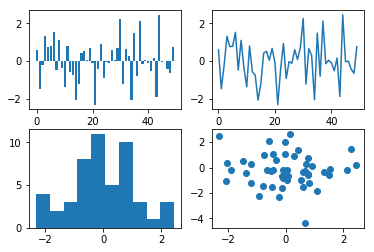

In [11]:
# Basic Graphs in Python
# Listing P.11
# Last updated June 2018
#
#

import numpy as np
import matplotlib.pyplot as plt

y = np.random.normal(size = 50)
z = np.random.standard_t(df = 4, size = 50)

## using Matplotlib to plot bar, line, histogram and scatter plots

plt.subplot(2,2,1)
plt.bar(range(len(y)), y)
plt.subplot(2,2,2)
plt.plot(y)
plt.subplot(2,2,3)
plt.hist(y)
plt.subplot(2,2,4)
plt.scatter(y,z)

In [12]:
# Miscellaneous Useful Functions in Python
# Listing P.12
# Last updated June 2018
#
#

## Convert objects from one type to another with int(), float() etc
## To check type, use type(object)

x = 8.0

print(type(x))

x = int(x)

print(type(x))

<class 'float'>
<class 'int'>


# Chapter 1: Financial Markets, Prices and Risk

-  1.1/1.2: Loading hypothetical stock prices, converting to returns, plotting returns
-  1.3/1.4: Summary statistics for returns timeseries
-  1.5/1.6: Autocorrelation function (ACF) plots, Ljung-Box test
-  1.7/1.8: Quantile-Quantile (QQ) plots
-  1.9/1.10: Correlation matrix between different stocks

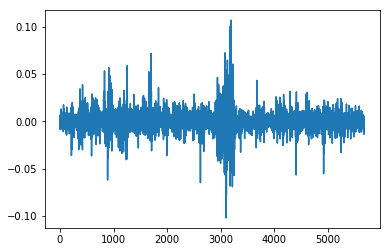

In [13]:
# Download S&P500 data in Python
# Listing 1.1/1.2
# Last updated June 2018
# 
#

import numpy as np
import matplotlib.pyplot as plt

price = np.loadtxt('index.csv', delimiter = ',', skiprows = 1)

y = np.diff(np.log(price), n=1, axis=0)

plt.plot(y)
plt.show()
plt.close()

In [14]:
# Sample statistics in Python
# Listing 1.3/1.4
# Last updated June 2018
# 
#

from scipy import stats
import statsmodels.api as sm

print (np.mean(y))
print (np.std(y, ddof=1))
print (np.min(y))
print (np.max(y))
print (stats.skew(y))
print (stats.kurtosis(y, fisher = False))
print (sm.tsa.stattools.acf(y, nlags=1))
print (sm.tsa.stattools.acf(np.square(y),nlags=1))
print (stats.jarque_bera(y))

from statsmodels.stats.diagnostic import acorr_ljungbox
print (acorr_ljungbox(y, lags=20))
print (acorr_ljungbox(np.square(y), lags=20))

0.00025815990082599837
0.010005728643763066
-0.10195548627302298
0.10673589502911707
0.1526332698963366
16.981171461092003
[1.         0.01481546]
[1.         0.19918747]
(46251.44013954825, 0.0)
(array([ 1.24652843,  1.49630475,  1.95435595, 10.56862069, 20.60388457,
       23.7456834 , 36.58708679, 37.31340677, 46.30116726, 47.17228062,
       49.06138354, 50.40149609, 54.26069318, 54.55943078, 62.01752819,
       73.97041528, 74.26300972, 87.93328   , 89.14813776, 93.4881264 ]), array([2.64216565e-01, 4.73240115e-01, 5.81934136e-01, 3.18647710e-02,
       9.62181578e-04, 5.81597004e-04, 5.61548783e-06, 1.00774323e-05,
       5.29436851e-07, 8.78518916e-07, 9.22480937e-07, 1.18751809e-06,
       5.44547145e-07, 1.03040415e-06, 1.13104919e-07, 1.99200769e-09,
       3.93039316e-09, 3.38614811e-11, 4.69404971e-11, 1.80880135e-11]))
(array([ 225.31803361,  344.09046026,  430.9417807 ,  669.00999566,
        827.74517763, 1040.35673721, 1075.99871465, 1157.11571386,
       1176.92318119,

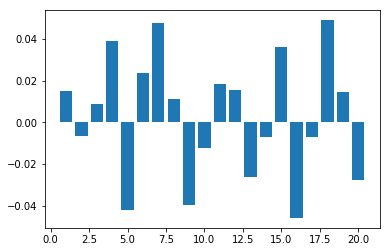

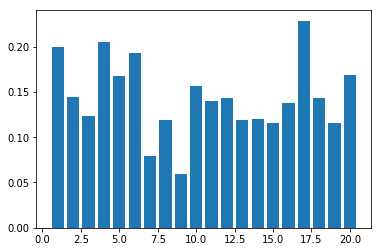

In [15]:
# ACF plots and the Ljung-Box test in Python
# Listing 1.5/1.6
# Last updated June 2018
# 
#

import statsmodels.api as sm
import matplotlib.pyplot as plt

q = sm.tsa.stattools.acf(y, nlags=20)
plt.bar(x = np.arange(1,len(q)), height = q[1:])
plt.show()
plt.close()

q = sm.tsa.stattools.acf(np.square(y), nlags=20)
plt.bar(x = np.arange(1,len(q)), height = q[1:])
plt.show()
plt.close()

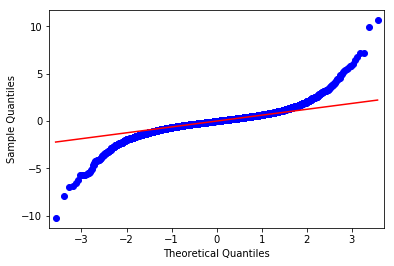

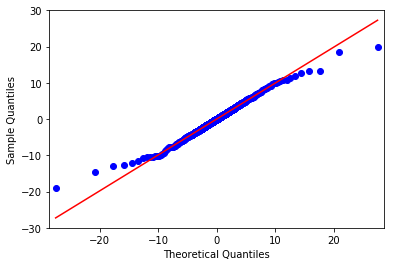

In [16]:
# QQ plots in Python
# Listing 1.7/1.8
# Last updated June 2018
# 
#

from statsmodels.graphics.gofplots import qqplot

fig1 = qqplot(y, line='q', dist = stats.norm, fit = True)               
plt.show()
plt.close()

fig2 = qqplot(y, line='q', dist = stats.t, distargs=(5,), fit = True)
plt.show()
plt.close()

In [17]:
# Download stock prices in Python
# Listing 1.9/1.10
# Last updated June 2018
# 
#

import numpy as np

p = np.loadtxt('stocks.csv',delimiter=',',skiprows = 1)
    
y = np.diff(np.log(p), n=1, axis=0)

np.corrcoef(y, rowvar=False) # correlation matrix

## rowvar=False indicates that columns are variables

array([[1.        , 0.22968419, 0.21261918],
       [0.22968419, 1.        , 0.14505109],
       [0.21261918, 0.14505109, 1.        ]])

# Chapter 2: Univariate Volatility Modelling

-  2.1/2.2: GARCH and t-GARCH estimation
-  2.3/2.4: APARCH estimation (unavailable as of June 2018)

In [18]:
# START
# ARCH and GARCH estimation in Python
# Listing 2.1/2.2
# Last updated June 2018
# 
#

import numpy as np

p = np.loadtxt('index.csv', delimiter = ',', skiprows = 1)

y = np.diff(np.log(p), n=1, axis=0)*100

y = y-np.mean(y)

from arch import arch_model   
## using Kevin Sheppard's ARCH package for Python

## ARCH(1)
am = arch_model(y, mean = 'Zero', vol='Garch', p=1, o=0, q=0, dist='Normal')
am.fit(update_freq=5)

## ARCH(4)
am = arch_model(y, mean = 'Zero', vol='Garch', p=4, o=0, q=0, dist='Normal')
am.fit(update_freq=5)

## GARCH(4,1)
am = arch_model(y, mean = 'Zero', vol='Garch', p=4, o=0, q=1, dist='Normal')
am.fit(update_freq=5)

## GARCH(1,1)
am = arch_model(y, mean = 'Zero', vol='Garch', p=1, o=0, q=1, dist='Normal')
am.fit(update_freq=5)

## t-GARCH(1,1)
am = arch_model(y, mean = 'Zero', vol='Garch', p=1, o=0, q=1, dist='StudentsT')
am.fit(update_freq=5)

## comment out all the lines except one to see its output

Iteration:      5,   Func. Count:     26,   Neg. LLF: 7670.544758563633
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7670.482633064942
            Iterations: 8
            Function evaluations: 38
            Gradient evaluations: 8
Iteration:      5,   Func. Count:     42,   Neg. LLF: 7312.270175946152
Iteration:     10,   Func. Count:     82,   Neg. LLF: 7278.787143922385
Iteration:     15,   Func. Count:    117,   Neg. LLF: 7278.140560352783
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7278.1405583241585
            Iterations: 16
            Function evaluations: 124
            Gradient evaluations: 16
Iteration:      5,   Func. Count:     47,   Neg. LLF: 6972.9025629023245
Iteration:     10,   Func. Count:     91,   Neg. LLF: 6964.5329432813105
Iteration:     15,   Func. Count:    132,   Neg. LLF: 6964.2810084657995
Optimization terminated successfully.    (Exit mode 0)
            Curren

                          Zero Mean - GARCH Model Results                           
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -6551.58
Distribution:      Standardized Student's t   AIC:                           13111.2
Method:                  Maximum Likelihood   BIC:                           13137.7
                                              No. Observations:                 5676
Date:                      Thu, Jul 05 2018   Df Residuals:                     5672
Time:                              10:53:12   Df Model:                            4
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omeg

In [19]:
# Advanced ARCH and GARCH estimation in Python
# Listing 2.3/2.4
# Last updated June 2018
# 
#

## Python does not have a proper APARCH package at present
## To be introduced in scikits.statsmodels

# Chapter 3: Multivariate Volatility Models

-  3.1/3.2: Loading hypothetical stock prices
-  3.3/3.4: EWMA estimation
-  3.5/3.6: OGARCH estimation (unavailable as of June 2018)
-  3.7/3.8: DCC estimation (unavailable as of June 2018)
-  3.9/3.10: Comparison of EWMA, OGARCH, DCC (unavailable as of June 2018)

In [20]:
# Download stock prices in Python
# Listing 3.1/3.2
# Last updated June 2018
# 
#

import numpy as np

p = np.loadtxt('stocks.csv',delimiter=',',skiprows=1)
p = p[:,[0,1]]                          # consider first two stocks

y = np.diff(np.log(p), n=1, axis=0)*100 # calculate returns

y[:,0] = y[:,0]-np.mean(y[:,0])         # subtract mean
y[:,1] = y[:,1]-np.mean(y[:,1])

T = len(y[:,0])

In [21]:
# EWMA in Python
# Listing 3.3/3.4
# Last updated June 2018
# 
#

EWMA = np.full([T,3], np.nan)

lmbda = 0.94

S = np.cov(y, rowvar = False)

EWMA[0,] = S.flatten()[[0,3,1]]

for i in range(1,T):
    S = lmbda * S + (1-lmbda) * np.transpose(np.asmatrix(y[i-1]))* np.asmatrix(y[i-1])
    EWMA[i,] = [S[0,0], S[1,1], S[0,1]]

EWMArho = np.divide(EWMA[:,2], np.sqrt(np.multiply(EWMA[:,0],EWMA[:,1])))

print(EWMArho)

[0.22968419 0.22363473 0.22182769 ... 0.34366321 0.31227409 0.31597027]


In [22]:
# OGARCH in Python
# Listing 3.5/3.6
# Last updated June 2018
# 
#

## Python does not have a proper OGARCH package at present

In [23]:
# DCC in Python
# Listing 3.7/3.8
# Last updated June 2018
# 
#

## Python does not have a proper DCC package at present

In [24]:
# Correlation comparison in Python
# Listing 3.9/3.10
# Last updated June 2018
# 
#

## Python does not have a proper OGARCH/DCC package at present

# Chapter 4: Risk Measures

-  4.1/4.2: Expected Shortfall (ES) estimation under normality assumption

In [25]:
# ES in Python
# Listing 4.1/4.2
# Last updated June 2018
# 
#

from scipy import stats

p = [0.5, 0.1, 0.05, 0.025, 0.01, 0.001]
VaR = stats.norm.ppf(p)
ES = stats.norm.pdf(stats.norm.ppf(p))/p

# Chapter 5: Implementing Risk Forecasts

-  5.1/5.2: Loading hypothetical stock prices, converting to returns
-  5.3/5.4: Univariate HS Value at Risk (VaR)
-  5.5/5.6: Multivariate HS VaR
-  5.7/5.8: Univariate ES VaR
-  5.9/5.10: Normal VaR
-  5.11/5.12: Portfolio Normal VaR
-  5.13/5.14: Student-t VaR
-  5.15/5.16: Normal ES VaR
-  5.17/5.18: Direct Integration Normal ES VaR
-  5.19/5.20: MA Normal VaR
-  5.21/5.22: EWMA VaR
-  5.23/5.24: Two-asset EWMA VaR
-  5.25/5.26: GARCH(1,1) VaR

In [26]:
# Download stock prices in Python
# Listing 5.1/5.2
# Last updated June 2018
# 
# 

import numpy as np

p = np.loadtxt('stocks.csv',delimiter=',',skiprows=1)
p = p[:,[0,1]]      # consider first two stocks
## convert prices to returns, and adjust length

y1 = np.diff(np.log(p[:,0]), n=1, axis=0)
y2 = np.diff(np.log(p[:,1]), n=1, axis=0)
y1 = y1[len(y1)-4100:]
y2 = y2[len(y2)-4100:]

y = np.stack([y1,y2], axis = 1)
T = len(y1)
value = 1000 # portfolio value
p = 0.01 # probability

In [27]:
# Univariate HS in Python
# Listing 5.3/5.4
# Last updated June 2018
# 
# 

ys = np.sort(y1) # sort returns
op = int(T*p)    # p percent smallest
VaR1 = -ys[op - 1] * value

print(VaR1)

18.658613238505815


In [28]:
# Multivariate HS in Python
# Listing 5.5/5.6
# Last updated June 2018
# 
# 

w = [[0.3], [0.7]]               # vector of portfolio weights
yp = np.squeeze(np.matmul(y, w)) # portfolio returns
yps = np.sort(yp)
VaR2= -yps[op - 1] * value

print(VaR2)

19.814456605005404


In [29]:
# Univariate ES in Python
# Listing 5.7/5.8
# Last updated June 2018
# 
# 

ES1 = -np.mean(ys[:op]) * value

print(ES1)

23.87291504895465


In [30]:
# Normal VaR in Python
# Listing 5.9/5.10
# Last updated June 2018
# 
#

sigma = np.std(y1, ddof=1) # estimate volatility
VaR3 = -sigma * stats.norm.ppf(p) * value 

print(VaR3)

15.588003164464864


In [31]:
# Portfolio normal VaR in Python
# Listing 5.11/5.12
# Last updated June 2018
# 
# 

## portfolio volatility
sigma = np.sqrt(np.mat(np.transpose(w))*np.mat(np.cov(y,rowvar=False))*np.mat(w))[0,0]
## Note: [0,0] is to pull the first element of the matrix out as a float
VaR4 = -sigma * stats.norm.ppf(p) * value 

print(VaR4)

18.1382853419858


In [32]:
# Student-t VaR in Python
# Listing 5.13/5.14
# Last updated June 2018
# 
# 

scy1 = y1 * 100         # scale the returns
res = stats.t.fit(scy1)

sigma = res[2]/100      # rescale volatility
nu = res[0]

VaR5 = -sigma*stats.t.ppf(p,nu)*value

print(VaR5)

17.88821026155241


In [33]:
# Normal ES in Python
# Listing 5.15/5.16
# Last updated June 2018
# 
# 

sigma = np.std(y1, ddof=1)
ES2 = sigma * stats.norm.pdf(stats.norm.ppf(p)) / p * value

print(ES2)

17.85862216236962


In [34]:
# Direct integration ES in Python
# Listing 5.17/5.18
# Last updated June 2018
# 
# 

from scipy.integrate import quad

VaR = -stats.norm.ppf(p)
integrand = lambda q: q * stats.norm.pdf(q)
ES = -sigma * quad(integrand, -np.inf, -VaR)[0] / p * value

print(ES)

17.858622162367393


In [35]:
# MA normal VaR in Python
# Listing 5.19/5.20
# Last updated June 2018
# 
#

WE = 20
for t in range(T-5,T+1):
    t1 = t-WE
    window = y1[t1:t]      # estimation window
    sigma = np.std(window, ddof=1)
    VaR6 = -sigma*stats.norm.ppf(p)*value
    print (VaR6)

16.05049679536141
16.149103169475975
18.854346063820373
18.882124798913356
16.230531751938656
16.169762107305665


In [36]:
# EWMA VaR in Python
# Listing 5.21/5.22
# Last updated June 2018
# 
#

lmbda = 0.94
s11 = np.var(y1[0:30], ddof = 1)     # initial variance

for t in range(1, T):
    s11 = lmbda*s11 + (1-lmbda)*y1[t-1]**2

VaR7 = -np.sqrt(s11)*stats.norm.ppf(p)*value

print(VaR7)

16.75344387500228


In [37]:
# Two-asset EWMA VaR in Python
# Listing 5.23/5.24
# Last updated June 2018
# 
# 

## s is the initial covariance
s = np.cov(y, rowvar = False)
for t in range(1,T):
    s = lmbda*s+(1-lmbda)*np.transpose(np.asmatrix(y[t-1,:]))*np.asmatrix(y[t-1,:])

sigma = np.sqrt((np.transpose(w)*s*w)[0,0])
## Note: [0,0] is to pull the first element of the matrix out as a float

VaR8 = -sigma * stats.norm.ppf(p) * value

print(VaR8)

20.503632873363983


In [38]:
# GARCH VaR in Python
# Listing 5.25/5.26
# Last updated June 2018
# 
# 

from arch import arch_model 

am = arch_model(y1, mean = 'Zero', vol='Garch', p=1, o=0, q=1, dist='Normal')
res = am.fit(update_freq=5)
omega = res.params[0]
alpha = res.params[1]
beta = res.params[2]
## computing sigma2 for t+1
sigma2 = omega + alpha*y1[T-1]**2 + beta * res.conditional_volatility[-1]**2

VaR9 = -np.sqrt(sigma2) * stats.norm.ppf(p) * value

print(VaR9)

## Note: arch_model's GARCH optimization has issues with convergence

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -14934.01915620912
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 1
16.70978077012851


# Chapter 6: Analytical Value-at-Risk for Options and Bonds

-  6.1/6.2: Black-Scholes function definition
-  6.3/6.4: Black-Scholes option price calculation example

In [39]:
# Black-Scholes function in Python
# Listing 6.1/6.2
# Last updated June 2018
# 
# 

import numpy as np
from scipy import stats

def bs(X, P, r, sigma, T):
    d1 = (np.log(P/X) + (r + 0.5 * sigma**2)*T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    Call = P * stats.norm.cdf(d1) - X * np.exp(-r * T) * stats.norm.cdf(d2)
    Put = X * np.exp(-r * T) * stats.norm.cdf(-d2) - P * stats.norm.cdf(-d1)
    
    Delta_Call = stats.norm.cdf(d1)
    Delta_Put = Delta_Call - 1
    Gamma = stats.norm.pdf(d1) / (P * sigma * np.sqrt(T))
    
    return {"Call": Call, "Put": Put, "Delta_Call": Delta_Call, "Delta_Put": Delta_Put, "Gamma": Gamma}

In [40]:
# Black-Scholes in Python
# Listing 6.3/6.4
# Last updated June 2018
# 
# 

f = bs(90, 100, 0.05, 0.2, 0.5)

print (f)

{'Call': 13.498517482637212, 'Put': 1.2764095651871656, 'Delta_Call': 0.8395228492806657, 'Delta_Put': -0.16047715071933433, 'Gamma': 0.017238257785615545}


# Chapter 7: Simulation Methods for VaR for Options and Bonds

-  7.1/7.2: Plotting normal distribution transformation
-  7.3/7.4: Random number generation from Uniform(0,1), Normal(0,1)
-  7.5/7.6: Bond pricing using yield curve
-  7.7/7.8: Yield curve simulations
-  7.9/7.10: Bond price simulations
-  7.11/7.12: Black-Scholes analytical pricing of call
-  7.13/7.14: Black-Scholes Monte Carlo simulation pricing of call
-  7.15/7.16: Option density plots
-  7.17/7.18: VaR simulation of portfolio with only underlying
-  7.19/7.20: VaR simulation of portfolio with only call
-  7.21/7.22: VaR simulation of portfolio with call, put and underlying
-  7.23/7.24: Simulated two-asset returns
-  7.25/7.26: Two-asset portfolio VaR
-  7.27/7.28: Two-asset portfolio VaR with a call

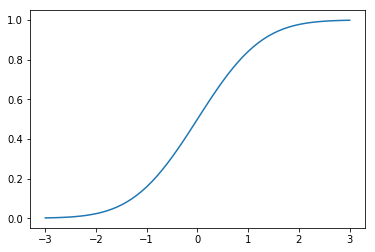

In [41]:
# Transformation in Python
# Listing 7.1/7.2
# Last updated June 2018
# 
#

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-3,3.1, step = 0.1) # Python's arange excludes the last value
plt.plot(x, stats.norm.cdf(x))
plt.show()
plt.close()

In [42]:
# Various RNs in Python
# Listing 7.3/7.4
# Last updated June 2018
# 
# 

import numpy as np

np.random.seed(12)     # set seed
S = 10

print (np.random.uniform(size=S))
print (np.random.normal(size=S))
print (np.random.standard_t(df=4,size=S))

[0.15416284 0.7400497  0.26331502 0.53373939 0.01457496 0.91874701
 0.90071485 0.03342143 0.95694934 0.13720932]
[ 0.75314283 -1.53472134  0.00512708 -0.12022767 -0.80698188  2.87181939
 -0.59782292  0.47245699  1.09595612 -1.2151688 ]
[ 1.54289086  0.69652904  0.52148112 -0.25218158 -4.66442107 -2.42642183
  0.27546574 -2.17082333  1.29967088  1.7842616 ]


In [43]:
# Price bond in Python
# Listing 7.5/7.6
# Last updated June 2018
# 
# 

import numpy as np

yield_c = [5.00, 5.69, 6.09, 6.38, 6.61, 
           6.79, 6.94, 7.07, 7.19, 7.30] # yield curve

T = len(yield_c)
r = 0.07                                 # initial yield rate
Par = 10                                 # par value
coupon = r * Par                         # coupon payments 
cc = [coupon] * 10                       # vector of cash flows
cc[9] += Par                             # add par to cash flows
P=np.sum(cc/(np.power((1+np.divide(yield_c,100)),
                      list(range(1,T+1))))) # calc price

print(P)

9.913205732444842


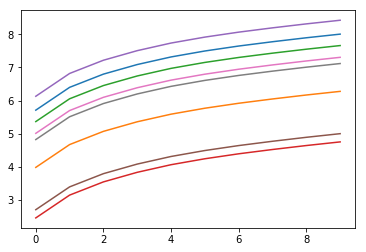

In [44]:
# Simulate yields in Python
# Listing 7.7/7.8
# Last updated June 2018
# 
# 

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12)                   # set seed
sigma = 1.5                          # daily yield volatility
S = 8                                # number of simulations
r = np.random.normal(0,sigma,size=S) # generate random numbers

ysim = np.zeros([T,S])
for i in range(S):
    ysim[:,i] = yield_c + r[i]

plt.plot(ysim)
plt.show()
plt.close()

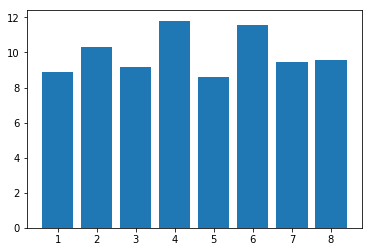

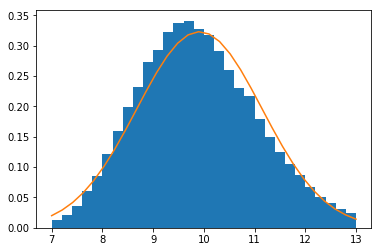

In [45]:
# Simulate bond prices in Python
# Listing 7.9/7.10
# Last updated June 2018
# 
# 

import numpy as np
import matplotlib.pyplot as plt

S = 8
SP = np.zeros([S])

for i in range(S): # S simulations
    SP[i] = np.sum(cc/((1+ysim[:,i]/100)**T))

SP -= (np.mean(SP) - P) # correct for mean

plt.bar(range(1,S+1), SP)
plt.show()
plt.close()

S = 50000

r = np.random.normal(0, sigma, size = S)

ysim = np.zeros([T,S])
for i in range(S):
    ysim[:,i] = yield_c + r[i]

SP = np.zeros([S])

for i in range(S):
    SP[i] = np.sum(cc/((1+ysim[:,i]/100)**T))
    
SP -= (np.mean(SP) - P)

plt.hist(SP, bins = 30, range = (7, 13), density = True)

fitted_norm=stats.norm.pdf(np.linspace(7,13,30),
                           np.mean(SP),np.std(SP,ddof=1))

plt.plot(np.linspace(7,13,30), fitted_norm)
plt.show()
plt.close()

In [46]:
# Black-Scholes valuation in Python
# Listing 7.11/7.12
# Last updated June 2018
# 
# 

P0 = 50                     # initial spot price
sigma = 0.2                 # annual volatility
r = 0.05                    # annual interest
T = 0.5                     # time to expiration
X = 40                      # strike price
f = bs(X, P0, r, sigma, T)  # analytical call price
## this calculation uses the Black-Scholes pricing function (Listing 6.1/6.2)

print (f)

{'Call': 11.087280700718757, 'Put': 0.09967718185206187, 'Delta_Call': 0.9660259272621473, 'Delta_Put': -0.03397407273785269, 'Gamma': 0.010663779610020534}


In [47]:
# Black-Scholes simulation in Python
# Listing 7.13/7.14
# Last updated June 2018
# 
#

import numpy as np

np.random.seed(12)          # set seed
S = 10**6                   # number of simulations
F = P0 * np.exp(r * T)      # futures price
ysim=np.random.normal(-0.5*sigma**2*T,
                      sigma*np.sqrt(T),size=S) # sim returns, lognorm corrected
F = F * np.exp(ysim)        # sim futures price
SP = F - X                  # payoff
SP[SP < 0] = 0              # set negative outcomes to zero
fsim = SP * np.exp(-r * T)  # discount
call_sim = np.mean(fsim)    # simulated price
print(call_sim)

11.068936888001415


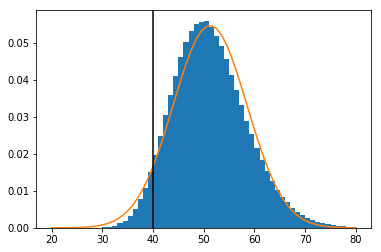

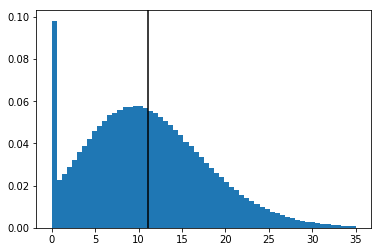

In [48]:
# Option density plots in Python
# Listing 7.15/7.16
# Last updated June 2018
# 
# 

import numpy as np
import matplotlib.pyplot as plt

plt.hist(F, bins = 60, range = (20,80), density = True)
fitted_norm=stats.norm.pdf(np.linspace(20,80,60),np.mean(F),np.std(F,ddof=1))
plt.plot(np.linspace(20,80,60), fitted_norm)
plt.axvline(x=X, color='k')                 
plt.show()
plt.close()

plt.hist(fsim, bins = 60, range = (0, 35), density = True)
plt.axvline(x=f['Call'], color='k')
plt.show()
plt.close()

In [49]:
# Simulate VaR in Python
# Listing 7.17/7.18
# Last updated June 2018
# 
#

import numpy as np

np.random.seed(1)       # set seed
S = 10**7               # number of simulations
s2 = 0.01**2            # daily variance
p = 0.01                # probability
r = 0.05                # annual riskfree rate
P = 100                 # price today
ysim=np.random.normal(r/365-0.5*s2,np.sqrt(s2),size=S) # sim returns
Psim = P * np.exp(ysim) # sim future prices
q = np.sort(Psim - P) # simulated P/L
VaR1 = -q[int(p*S) - 1]

print(VaR1)

2.290784802622909


In [50]:
# Simulate option VaR in Python
# Listing 7.19/7.20
# Last updated June 2018
# 
# 

import numpy as np

T = 0.25       # time to expiration
X = 100                                 # strike price
sigma = np.sqrt(s2 * 250)               # annual volatility
f = bs(X, P, r, sigma, T)               # analytical call price
fsim = bs(X, Psim, r, sigma, T-(1/365)) # sim option prices
q = np.sort(fsim['Call']-f['Call'])     # simulated P/L
VaR2 = -q[int(p*S) - 1] 

print(VaR2)

1.2150728853608541


In [51]:
# Example 7.3 in Python
# Listing 7.21/7.22
# Last updated June 2018
# 
#

import numpy as np

X1 = 100
X2 = 110
f1 = bs(X1, P, r, sigma, T)
f2 = bs(X2, P, r, sigma, T)
f2sim = bs(X2, Psim, r, sigma, T-(1/365))
f1sim = bs(X1, Psim, r, sigma, T-(1/365))
q = np.sort(f1sim['Call'] + f2sim['Put'] + Psim - f1['Call'] - f2['Put'] - P)
VaR3 = -q[int(p*S) - 1]

print(VaR3)

1.4952375118324568


In [52]:
# Simulated two-asset returns in Python
# Listing 7.23/7.24
# Last updated June 2018
# 
#

import numpy as np

np.random.seed(12)                                      # set seed
mu = np.transpose([r/365, r/365])                       # return mean
Sigma = np.matrix([[0.01, 0.0005],[0.0005, 0.02]])      # covariance matrix
y = np.random.multivariate_normal(mu, Sigma, size = S)  # simulated returns

In [53]:
# Two-asset VaR in Python
# Listing 7.25/7.26
# Last updated June 2018
# 
#

import numpy as np

P = np.asarray([100, 50])              # prices
x = np.asarray([1, 1])                 # number of assets
Port = np.matmul(P, x)                 # portfolio at t
Psim=np.matlib.repmat(P,S,1)*np.exp(y) # simulated prices
PortSim = np.matmul(Psim, x)           # simulated portfolio value
q = np.sort(PortSim - Port)            # simulated P/L
VaR4 = -q[int(p*S) - 1]

print(VaR4)

25.942795557394135


In [54]:
# A two-asset case in Python with an option
# Listing 7.27/7.28
# Last updated June 2018
# 
#

import numpy as np

f = bs(P[1], P[1], r, sigma, T)
fsim = bs(P[1], Psim[:,1], r, sigma, T-(1/365))
q = np.sort(fsim['Call'] + Psim[:,0] - f['Call'] - P[0])
VaR5 = -q[int(p*S) - 1]

print(VaR5)

20.777617782200394


# Chapter 8: Backtesting and Stress Testing

-  8.1/8.2: Loading hypothetical stock prices, converting to returns
-  8.3/8.4: Setting up backtest 
-  8.5/8.6: Running backtest for EWMA/MA/HS/GARCH VaR
-  8.7/8.8: Backtesting analysis for EWMA/MA/HS/GARCH VaR
-  8.9/8.10: Bernoulli coverage test
-  8.11/8.12: Independence test
-  8.13/8.14: Running Bernoulli/Independence test on backtests
-  8.15/8.16: Running backtest for EWMA/HS ES
-  8.17/8.18: Backtesting analysis for EWMA/HS ES

In [55]:
# Load data in Python
# Listing 8.1/8.2
# Last updated June 2018
# 
#

import numpy as np

price = np.loadtxt('index.csv',delimiter=',',skiprows=1)

y = np.diff(np.log(price), n=1, axis=0) # get returns

In [56]:
# Set backtest up in Python
# Listing 8.3/8.4
# Last updated June 2018
# 
#

import numpy as np

T = len(y)                   # number of obs for y
WE = 1000                    # estimation window length
p = 0.01                     # probability
l1 = int(WE * p)             # HS observation
value = 1                    # portfolio value
VaR = np.full([T,4], np.nan) # matrix for forecasts

## EWMA setup

lmbda = 0.94
s11 = np.var(y[1:30])

for t in range(1,WE):
    s11=lmbda*s11+(1-lmbda)*y[t-1]**2

In [57]:
# Running backtest in Python
# Listing 8.5/8.6
# Last updated June 2018
# 
#

import numpy as np
from scipy import stats
from arch import arch_model

for t in range(WE, T): 
    t1 = t - WE           # start of data window
    t2 = t - 1            # end of data window
    window = y[t1:t2+1]   # data for estimation

    s11 = lmbda * s11 + (1-lmbda) * y[t-1]**2
    VaR[t,0]=-stats.norm.ppf(p)*np.sqrt(s11)*value # EWMA
 
    VaR[t,1]=-np.std(window,ddof=1)*stats.norm.ppf(p)*value # MA

    ys = np.sort(window)
    VaR[t,2] = -ys[l1 - 1] * value # HS

    am = arch_model(window, mean = 'Zero',vol='Garch',
                    p=1, o=0, q=1, dist='Normal')
    res = am.fit(update_freq=0, disp='off',show_warning=False)
    par = [res.params[0], res.params[1], res.params[2]]
    s4 = par[0] + par[1] * window[WE - 1]**2 + par[
        2] * res.conditional_volatility[-1]**2
    VaR[t,3] = -np.sqrt(s4) * stats.norm.ppf(p) * value # GARCH(1,1)
    
## GARCH optimization in Python has some convergence issues

[0, 'EWMA', 2.0744225834046195, 0.012114060767698045]
[1, 'MA', 1.8605645851154835, 0.006622264894588886]
[2, 'HS', 1.2403763900769889, 0.012291715857673132]
[3, 'GARCH', 1.561163387510693, 0.01042726110523949]


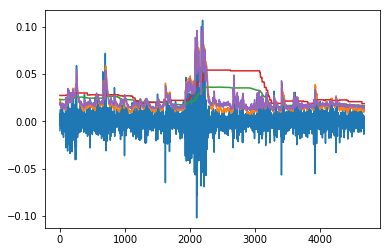

In [58]:
# Backtesting analysis in Python
# Listing 8.7/8.8
# Last updated June 2018
# 
#

W1 = WE # Python index starts at 0
m = ["EWMA", "MA", "HS", "GARCH"]

for i in range(4):
    VR = sum(y[W1:T] < -VaR[W1:T,i])/(p*(T-WE))
    s = np.std(VaR[W1:T, i], ddof=1)
    print ([i, m[i], VR, s])

plt.plot(y[W1:T])
plt.plot(VaR[W1:T])
plt.show()
plt.close()

In [59]:
# Bernoulli coverage test in Python
# Listing 8.9/8.10
# Last updated June 2018
# 
#
    
def bern_test(p,v):
    lv = len(v)
    sv = sum(v)
    
    al = np.log(p)*sv + np.log(1-p)*(lv-sv)
    bl = np.log(sv/lv)*sv + np.log(1-sv/lv)*(lv-sv)
    
    return (-2*(al-bl))

In [60]:
# Independence test in Python
# Listing 8.11/8.12
# Last updated June 2018
# 
#
    
def ind_test(V):
    J = np.full([T,4], 0)
    for i in range(1,len(V)-1):
        J[i,0] = (V[i-1] == 0) & (V[i] == 0)
        J[i,1] = (V[i-1] == 0) & (V[i] == 1)
        J[i,2] = (V[i-1] == 1) & (V[i] == 0)
        J[i,3] = (V[i-1] == 1) & (V[i] == 1)

    V_00 = sum(J[:,0])
    V_01 = sum(J[:,1])
    V_10 = sum(J[:,2])
    V_11 = sum(J[:,3])
    
    p_00=V_00/(V_00+V_01)
    p_01=V_01/(V_00+V_01)
    p_10=V_10/(V_10+V_11)
    p_11=V_11/(V_10+V_11)
    
    hat_p = (V_01+V_11)/(V_00+V_01+V_10+V_11)
    al = np.log(1-hat_p)*(V_00+V_10) + np.log(hat_p)*(V_01+V_11)
    bl = np.log(p_00)*V_00 + np.log(p_01)*V_01 + np.log(p_10)*V_10 + np.log(p_11)*V_11
    
    return (-2*(al-bl))

In [61]:
# Backtesting S&P 500 in Python
# Listing 8.13/8.14
# Last updated June 2018
# 
# 

W1 = WE
ya = y[W1:T]
VaRa = VaR[W1:T,]
m = ['EWMA', 'MA', 'HS', 'GARCH']

for i in range(4):
    q = y[W1:T] < -VaR[W1:T,i]
    v = VaRa*0
    v[q,i] = 1
    ber = bern_test(p, v[:,i])
    ind = ind_test(v[:,i])
    print ([i, m[i], ber, 1 - stats.chi2.cdf(ber, 1), ind, 1 - stats.chi2.cdf(ind, 1)])

[0, 'EWMA', 41.62569689139127, 1.1053091775181656e-10, 0.44066516062207484, 0.506801585279004]
[1, 'MA', 27.90392390704244, 1.2749095956721135e-07, 17.43854130344755, 2.967476695314719e-05]
[2, 'HS', 2.5354387107154253, 0.11131594337401196, 11.482938655669273, 0.0007023798480962906]
[3, 'GARCH', 12.701988930784978, 0.0003652668663879366, 0.5490928713535368, 0.45868858343961605]


In [62]:
# Backtest ES in Python
# Listing 8.15/8.16
# Last updated June 2018
# 
#

VaR = np.full([T,2], np.nan) # VaR forecasts
ES = np.full([T,2], np.nan)  # ES forecasts
for t in range(WE, T):
    t1 = t - WE
    t2 = t - 1
    window = y[t1:t2+1]

    s11 = lmbda * s11 + (1-lmbda) * y[t-1]**2
    VaR[t,0] = -stats.norm.ppf(p) * np.sqrt(s11)*value # EWMA
    ES[t,0]=np.sqrt(s11)*stats.norm.pdf(stats.norm.ppf(p))/p

    ys = np.sort(window)
    VaR[t,1] = -ys[l1 - 1] * value # HS
    ES[t,1] = -np.mean(ys[0:l1]) * value

In [63]:
# ES in Python
# Listing 8.17/8.18
# Last updated June 2018
# 
#

ESa = ES[W1:T,:]
VaRa = VaR[W1:T,:]
m = ["EWMA", "HS"]

for i in range(2):
    q = ya <= -VaRa[:,i]
    nES = np.mean(ya[q] / -ESa[q,i])
    print ([i, m[i], 'nES', nES])

[0, 'EWMA', 'nES', 1.2235184544783906]
[1, 'HS', 'nES', 1.053688543652173]


# Chapter 9: Extreme Value Theory

-  9.1/9.2: Calculation of tail index from returns

In [64]:
# Hill estimator in Python
# Listing 9.1/9.2
# Last updated June 2018
# 
#   

ysort = np.sort(y)                                # sort the returns
CT = 100                                          # set the threshold
iota = 1/(np.mean(np.log(ysort[0:CT]/ysort[CT]))) # get the tail index

print(iota) 

# END

2.62970984651441
